AttributeError: 'Line2D' object has no property 'fontsize'

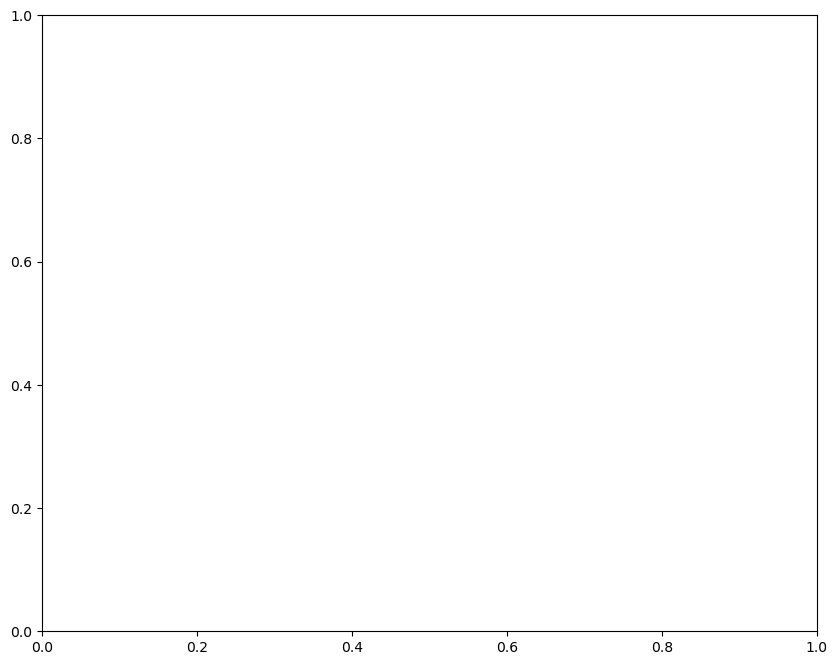

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

bulk_on_folder = "_validations/2024.04.14_bulk_on_vibr_on_1747.703sec"
bulk_on_files = "647.706698"

bulk_off_folder = "_validations/2024.04.14_bulk_off_vibr_on_1494.336sec"
bulk_off_files = "647.706698"

bulk_on_vibr_off_folder = "_validations/bulk_on_vibr_off_bctype1"
bulk_on_vibr_off_files = "6476.749887"

bulk_off_vibr_off_folder = "_validations/bulk_off_vibr_off_bctype1"
bulk_off_vibr_off_files = "6476.749887"

plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
file_names = ['density',  'pressure', 'temp', 'velocity']
latex_from_file_names = {
    'density': r'$\rho$, кг/м$^3$',
    'pressure': r'$p$, Па',
    'temp': r'$T$, K',
    'velocity': r'$v$, м/с'
}
plot_names_from_file_names = {
    'density': 'rho',
    'pressure': 'p',
    'temp': 'T',
    'velocity': 'v'
}

for i in range(len(file_names)):
    
    plt.figure(figsize=(10, 8))
    tocrop = 20
    
    data_bulk_on = pd.read_csv(f"{bulk_on_folder}/{bulk_on_files}/{file_names[i]}.txt", sep=' ')
    data_bulk_on.drop(data_bulk_on.head(tocrop).index, inplace=True) # можно обрезать первые n значений
    data_bulk_on.drop(data_bulk_on.tail(tocrop).index, inplace=True) # можно обрезать последние n значений
    plt.plot(data_bulk_on['y'], data_bulk_on[plot_names_from_file_names[file_names[i]]], label="$\zeta=\zeta_{CH_4}≠0$", fontsize=15)
    
    data_bulk_off = pd.read_csv(f"{bulk_off_folder}/{bulk_off_files}/{file_names[i]}.txt", sep=' ')
    data_bulk_off.drop(data_bulk_off.head(tocrop).index, inplace=True) # можно обрезать первые n значений
    data_bulk_off.drop(data_bulk_off.tail(tocrop).index, inplace=True) # можно обрезать последние n значений
    plt.plot(data_bulk_off['y'], data_bulk_off[plot_names_from_file_names[file_names[i]]], "--", label="$\zeta=0$", fontsize=15)
    
    data_bulk_on_vibr_off = pd.read_csv(f"{bulk_on_vibr_off_folder}/{bulk_on_vibr_off_files}/{file_names[i]}.txt", sep=' ')
    data_bulk_on_vibr_off.drop(data_bulk_on_vibr_off.head(tocrop).index, inplace=True) # можно обрезать первые n значений
    data_bulk_on_vibr_off.drop(data_bulk_on_vibr_off.tail(tocrop).index, inplace=True) # можно обрезать последние n значений
    plt.plot(data_bulk_on_vibr_off['y'], data_bulk_on_vibr_off[plot_names_from_file_names[file_names[i]]], label="$\zeta=\zeta_{CH_4}≠0$, no vibr", fontsize=15)

    data_bulk_off_vibr_off = pd.read_csv(f"{bulk_off_vibr_off_folder}/{bulk_off_vibr_off_files}/{file_names[i]}.txt", sep=' ')
    data_bulk_off_vibr_off.drop(data_bulk_off_vibr_off.head(tocrop).index, inplace=True) # можно обрезать первые n значений
    data_bulk_off_vibr_off.drop(data_bulk_off_vibr_off.tail(tocrop).index, inplace=True) # можно обрезать последние n значений
    plt.plot(data_bulk_off_vibr_off['y'], data_bulk_off_vibr_off[plot_names_from_file_names[file_names[i]]], "--", label="$\zeta=0$, no vibr", fontsize=15)
    
    #plt.title("Профиль безразмерной плотности")
    #plt.title(f"Профиль {latex_from_file_names[file_names[i]]} при условиях $M=3.8$, $T_0$=300 K, $p_0$=100 Па, 60 ячеек, шаг 120MFP")
    plt.xlabel(r"$y$, м")
    plt.ylabel(latex_from_file_names[file_names[i]])
    plt.grid(alpha=0.3) # сетка
    plt.legend(fontsize=15) # подписи осей
    plt.show()
